# CHAMPS Dataset Analysis

**Prepared by:** Solomon Amsalu

**Submitted to:** <br>
Ethiopia Public Health Institute<br>
National Data Management Center<br>
Data Analytics, Modeling and Visualization Division

**Date:** \today

### 1. Preprocessing and EDA

#### A. Read the dataset

In [1]:
import pandas as pd
# Load the dataset

df = pd.read_csv('champs.csv', encoding="utf-8")

#### B. How many rows and columns are in the dataset?

In [2]:
# Get the shape of the dataset
rows, cols = df.shape
print(f'The dataset contains {rows} rows and {cols} columns.')

The dataset contains 444 rows and 381 columns.


#### C. Enumerate the columns of the dataset

In [3]:
# List the columns in the dataset
print("Columns in the dataset: ", df.columns.tolist())

Columns in the dataset:  ['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002', 'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007', 'dp_008', 'dp_009', 'dp_010', 'dp_011', 'dp_012', 'dp_013', 'dp_153', 'dp_016', 'dp_017', 'dp_154', 'dp_155', 'dp_014', 'dp_108', 'dp_109', 'dp_110', 'dp_111', 'dp_112', 'dp_113', 'dp_114', 'dp_115', 'dp_116', 'dp_117', 'dp_157', 'dp_018', 'dp_019', 'dp_020', 'dp_021', 'dp_022', 'dp_023', 'dp_024', 'dp_025', 'dp_026', 'dp_027', 'dp_156', 'dp_028', 'dp_029', 'dp_030', 'dp_031', 'dp_032', 'dp_033', 'dp_034', 'dp_035', 'dp_036', 'dp_037', 'dp_038', 'dp_039', 'dp_040', 'dp_041', 'dp_042', 'dp_043', 'dp_044', 'dp_045', 'dp_046', 'dp_047', 'dp_048', 'dp_049', 'dp_050', 'dp_051', 'dp_052', 'dp_053', 'dp_054', 'dp_055', 'dp_056', 'dp_057', 'dp_058', 'dp_059', 'dp_060', 'dp_061', 'dp_062', 'dp_063', 'dp_064', 'dp_065', 'dp_066', 'dp_067', 'dp_068', 'dp_069', 'dp_070', 'dp_071', 'dp_072', 'dp_073', 'dp_074', 'dp_075', 'dp_076', 'dp_077', 'dp_078', 'dp_07

#### D. Rename the columns


In [4]:
# Rename the columns as specified
df.rename(columns={'dp_013': 'case_type', 'dp_108': 'underlying_cause', 'dp_118': 'maternal_condition'}, inplace=True)

#### E. Rename values


In [5]:
# Dictionary for renaming case_type values
case_type_mapping = {
    'CH00716': 'Stillbirth',
    'CH01404': 'Death in the first 24 hours',
    'CH01405': 'Early Neonate (1 to 6 days)',
    'CH01406': 'Late Neonate (7 to 27 days)',
    'CH00718': 'Infant (28 days to less than 12 months)',
    'CH00719': 'Child (12 months to less than 60 months)'
}

df['case_type'] = df['case_type'].replace(case_type_mapping)

#### F. Show the proportion of null values in each column


In [6]:
# Calculate the proportion of null values in each column
null_proportion = df.isnull().mean()
print("Proportion of null values in each column:\n", null_proportion)

Proportion of null values in each column:
 packet_version_id                                 0.000000
id_ver_nmb                                        0.000000
champs_id                                         0.000000
dp_001                                            0.000000
dp_002                                            0.000000
                                                    ...   
dpf_012___ch01875                                 0.000000
dpf_012___ch00010                                 0.000000
dpf_013                                           0.590090
dpf_014                                           0.603604
crf_060302_decode_panel_feedback_form_complete    0.000000
Length: 381, dtype: float64


### 2. Descriptive Data Analysis

#### A. Magnitude and proportion of each of the infant underlying cause for child death


In [7]:
# Magnitude and proportion of underlying causes
underlying_cause_counts = df['underlying_cause'].value_counts()
underlying_cause_proportions = df['underlying_cause'].value_counts(normalize=True)
print('Magnitude of each underlying cause:\n', underlying_cause_counts)
print('Proportion of each underlying cause:\n', underlying_cause_proportions)

Magnitude of each underlying cause:
 underlying_cause
Intrauterine hypoxia                                148
Birth asphyxia                                       33
Undetermined                                         28
Severe acute malnutrition                            24
Craniorachischisis                                   16
                                                   ... 
Severe acute malnutrition-Kwashiorkor                 1
severe acute malnutrition, Marasmic Kwashiorkor       1
Severe acute malnutrition - Marasmic kwashiorkor      1
Congenital CMV infection                              1
Bacterial sepsis of the newborn                       1
Name: count, Length: 97, dtype: int64
Proportion of each underlying cause:
 underlying_cause
Intrauterine hypoxia                                0.333333
Birth asphyxia                                      0.074324
Undetermined                                        0.063063
Severe acute malnutrition                           0.

#### B. Proportion and magnitude of the maternal factors contributing to child death


In [8]:
# Magnitude and proportion of maternal factors
maternal_condition_counts = df['maternal_condition'].value_counts()
maternal_condition_proportions = df['maternal_condition'].value_counts(normalize=True)
print('Magnitude of each maternal condition:\n', maternal_condition_counts)
print('Proportion of each maternal condition:\n', maternal_condition_proportions)

Magnitude of each maternal condition:
 maternal_condition
Preeclampsia                                                                                             36
Twin pregnancy                                                                                           12
Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta)    11
Eclampsia                                                                                                 9
Fetus and newborn affected by other forms of placental separation and hemorrhage                          5
                                                                                                         ..
Fetus and newborn affected by oligohydramnios                                                             1
Fetus and newborn affected by maternal diabetes                                                           1
Fetus and newborn affected by maternal infectious and parasitic diseases (HIV)

#### C. Proportion of the child death by the case type


In [9]:
# Proportion of child death by case type
case_type_counts = df['case_type'].value_counts()
case_type_proportions = df['case_type'].value_counts(normalize=True)
print('Magnitude of each case type:\n', case_type_counts)
print('Proportion of each case type:\n', case_type_proportions)

Magnitude of each case type:
 case_type
Stillbirth                                  239
Death in the first 24 hours                  69
Early Neonate (1 to 6 days)                  49
Child (12 months to less than 60 months)     42
Infant (28 days to less than 12 months)      27
Late Neonate (7 to 27 days)                  18
Name: count, dtype: int64
Proportion of each case type:
 case_type
Stillbirth                                  0.538288
Death in the first 24 hours                 0.155405
Early Neonate (1 to 6 days)                 0.110360
Child (12 months to less than 60 months)    0.094595
Infant (28 days to less than 12 months)     0.060811
Late Neonate (7 to 27 days)                 0.040541
Name: proportion, dtype: float64


### 3. Correlation Analysis


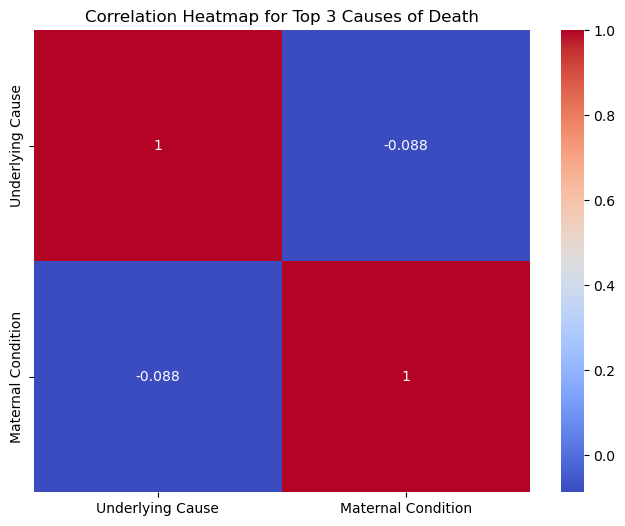

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the top three underlying causes of death
top_3_underlying_causes = underlying_cause_counts.head(3).index.tolist()

# Filter the dataframe to include only the rows with the top three underlying causes of death
df_top_3 = df[df['underlying_cause'].isin(top_3_underlying_causes)].copy()

# Convert 'underlying_cause' to categorical codes in the filtered dataframe
df_top_3['underlying_cause'] = df_top_3['underlying_cause'].astype('category').cat.codes

# Convert 'maternal_disease' to categorical codes in the filtered dataframe
df_top_3['maternal_condition'] = df_top_3['maternal_condition'].astype('category').cat.codes

# Compute the correlation matrix for the filtered dataframe
corr_matrix_top_3 = df_top_3[['underlying_cause', 'maternal_condition']].corr()

# Plot the heatmap for the filtered dataframe
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_top_3, annot=True, cmap='coolwarm', xticklabels=['Underlying Cause', 'Maternal Condition'], yticklabels=['Underlying Cause', 'Maternal Condition'])
plt.title('Correlation Heatmap for Top 3 Causes of Death')
plt.show()

### 4. Feature Engineering

#### A. Select and train classification models


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# Split data into features and target
X = df_top_3[['maternal_condition']]
y = df_top_3['underlying_cause']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Train the models and evaluate accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.8333
Support Vector Machine Accuracy: 0.8333
AdaBoost Accuracy: 0.8333
Random Forest Accuracy: 0.7619
Gradient Boosting Accuracy: 0.8333
XGBoost Accuracy: 0.8095


#### B. Import packages for classification models


This is already included in the previous code cell.

#### C. Rank features based on their importance


In [12]:
feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances[name] = model.coef_[0]
    else:
        feature_importances[name] = None
        # print(f"{name} does not have feature importances or coefficients.")
        
# Print feature importances
for model_name, importance in feature_importances.items():
    if importance is not None:
        print(f"Feature importances for {model_name}: {importance}")
    else:
        print(f"Feature importances for {model_name}: No feature importances available")


Feature importances for Logistic Regression: [0.00537952]
Feature importances for Support Vector Machine: No feature importances available
Feature importances for AdaBoost: [1.]
Feature importances for Random Forest: [1.]
Feature importances for Gradient Boosting: [1.]
Feature importances for XGBoost: [1.]


### 5. Model Evaluation

#### A. Import evaluation metric packages


In [13]:
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

#### B. Select the best performing model


In [14]:
#Perform cross-validation and select the best model
best_model = None
best_score = 0

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_model = model

    print(f"{name} Cross-Validation Accuracy: {mean_cv_score:.4f}")

print(f"Best Model: {best_model.__class__.__name__} with score {best_score:.2f}")

Logistic Regression Cross-Validation Accuracy: 0.6766
Support Vector Machine Cross-Validation Accuracy: 0.6766
AdaBoost Cross-Validation Accuracy: 0.6706
Random Forest Cross-Validation Accuracy: 0.6346
Gradient Boosting Cross-Validation Accuracy: 0.6406
XGBoost Cross-Validation Accuracy: 0.6166
Best Model: LogisticRegression with score 0.68


#### C. Ensemble the models


In [15]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with all models
ensemble_model = VotingClassifier(estimators=[
    ('lr', models['Logistic Regression']),
    ('svc', models['Support Vector Machine']),
    ('ada', models['AdaBoost']),
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting']),
    ('xgb', models['XGBoost'])
], voting='soft')

# Evaluate the ensemble model using cross-validation
model_performance = {}
cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='accuracy')
model_performance['Ensemble'] = cv_scores.mean()
print(f'Ensemble Model Cross-Validation Accuracy: {cv_scores.mean():.4f}')

Ensemble Model Cross-Validation Accuracy: 0.6287


#### D. Use Accuracy score metrics


In [16]:
# Fit each model and the ensemble model, then evaluate using accuracy score
for name, model in {**models, 'Ensemble': ensemble_model}.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Test Accuracy: {accuracy:.4f}')

Logistic Regression Test Accuracy: 0.8333
Support Vector Machine Test Accuracy: 0.8333
AdaBoost Test Accuracy: 0.8333
Random Forest Test Accuracy: 0.7857
Gradient Boosting Test Accuracy: 0.8333
XGBoost Test Accuracy: 0.8095
Ensemble Test Accuracy: 0.8571


#### E. Plot the AUC and ROC curve


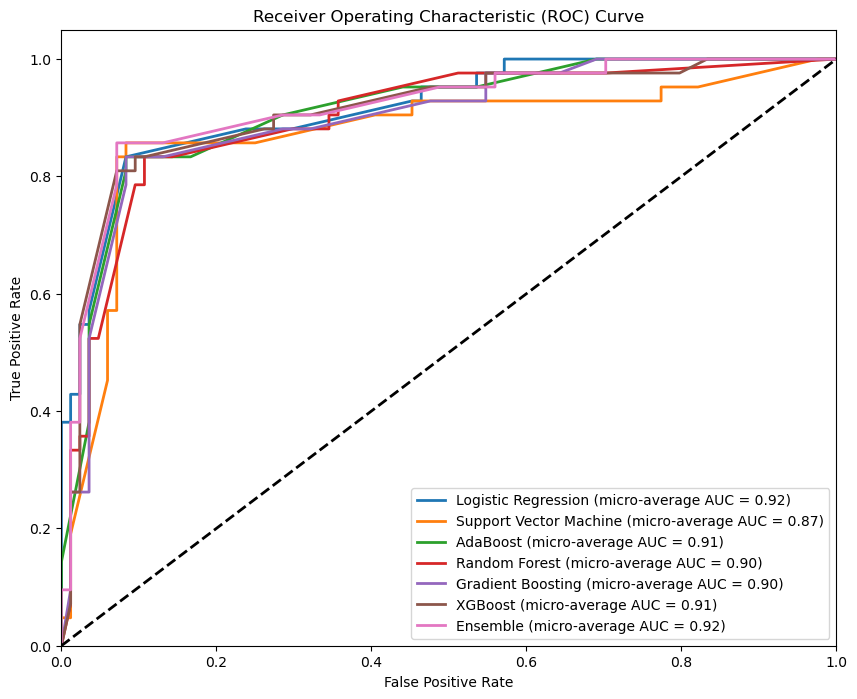

In [17]:
# Plot ROC curves
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import numpy as np

# Binarize the output
classes = np.unique(y_train)
y_train_binarized = label_binarize(y_train, classes=classes)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = len(classes)

# Update XGBoost parameters
xgb_params = {
    'objective': 'multi:softprob',
    'num_class': n_classes,
    'eval_metric': 'mlogloss'
}

# Update AdaBoost parameters
for name, model in models.items():
    if isinstance(model, xgb.XGBClassifier):
        model.set_params(**xgb_params)
    if hasattr(model, 'algorithm'):
        model.algorithm = 'SAMME'

# Train models and plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in {**models, 'Ensemble': ensemble_model}.items():
    model.fit(X_train, y_train)  # Fit directly with multiclass labels
    y_pred_prob = model.predict_proba(X_test)
    
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    
    # Plot micro-average ROC curve
    plt.plot(fpr, tpr,
             label=f'{name} (micro-average AUC = {roc_auc:.2f})',
             linewidth=2)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





### 6. Result Visualization

#### A. Plot feature importance


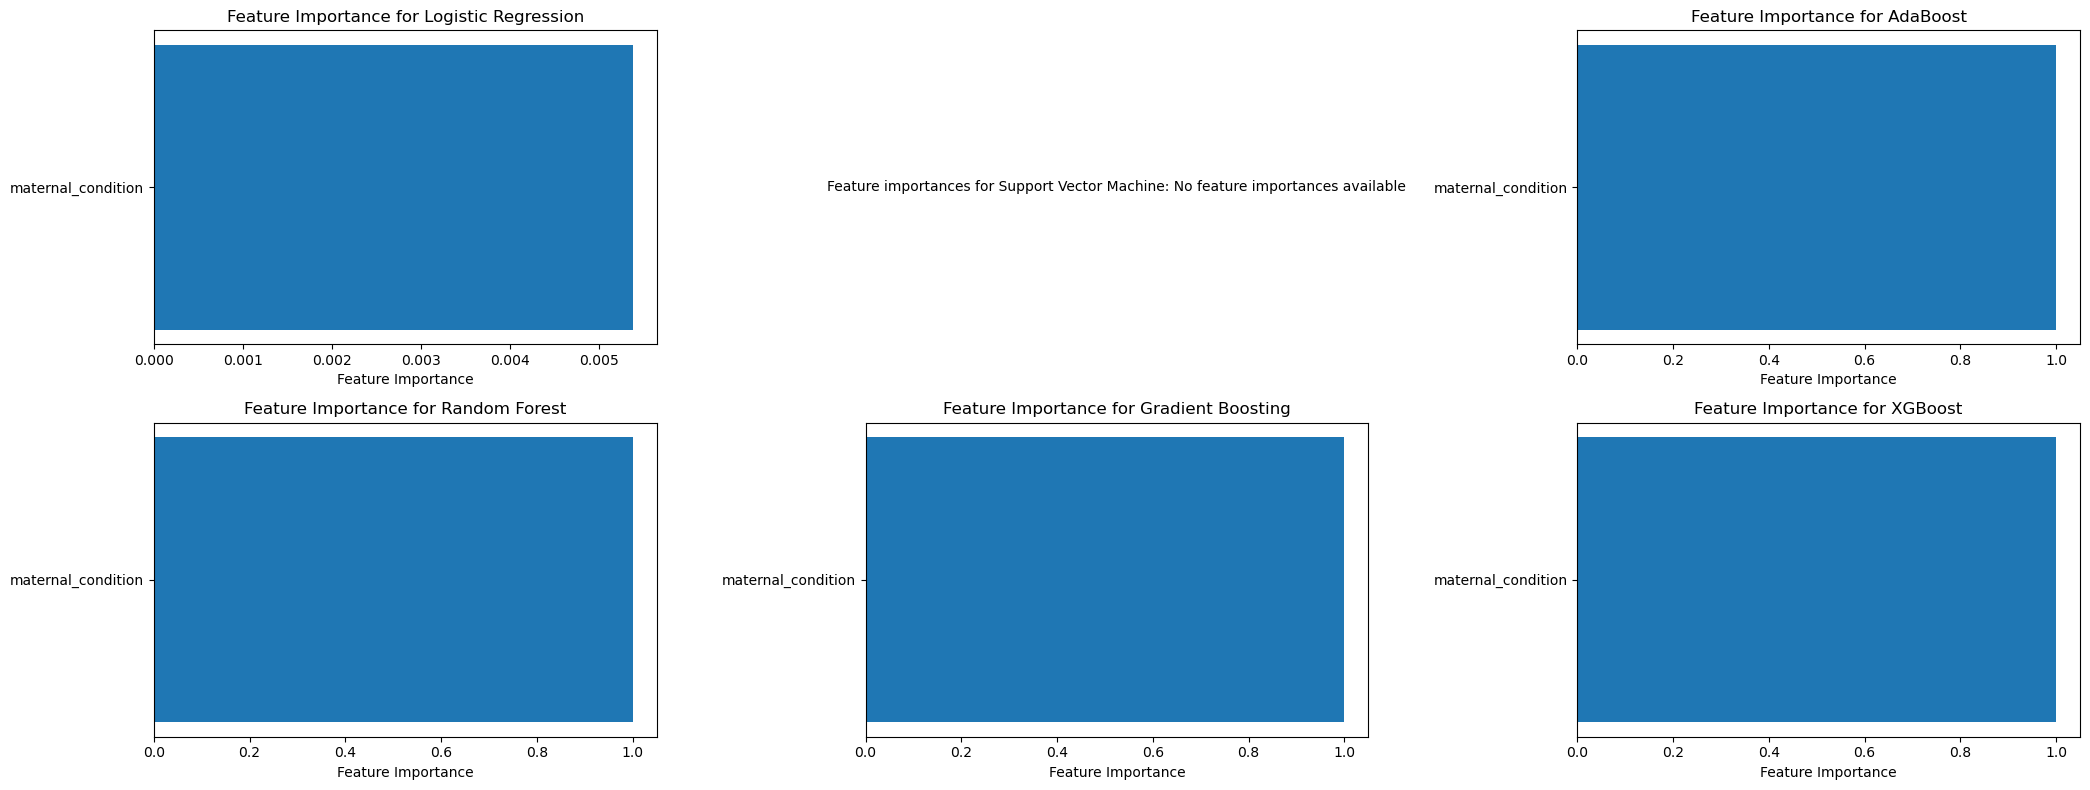

In [18]:
import matplotlib.pyplot as plt
import math
# Assuming feature_importances have been calculated as per your code
n_models = len(feature_importances)
n_cols = 3  # number of columns of subplots
n_rows = math.ceil(n_models / n_cols)  # number of rows of subplots

fig, axs = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 4*n_rows))  # Create subplots

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

for ax, (model_name, importance) in zip(axs, feature_importances.items()):
    if importance is not None:
        # Sort the features by importance
        sorted_indices = np.argsort(importance)

        ax.barh(range(len(importance)), importance[sorted_indices], align='center')
        ax.set_yticks(range(len(importance)))
        ax.set_yticklabels(X.columns[sorted_indices])  
        ax.set_xlabel('Feature Importance')
        ax.set_title(f'Feature Importance for {model_name}')
    else:
        ax.text(0.5, 0.5, f"Feature importances for {model_name}: No feature importances available",
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.axis('off')

# Remove unused subplots
if len(axs) > n_models:
    for ax in axs[n_models:]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()



#### B. Plot top five infant underlying causes of child death


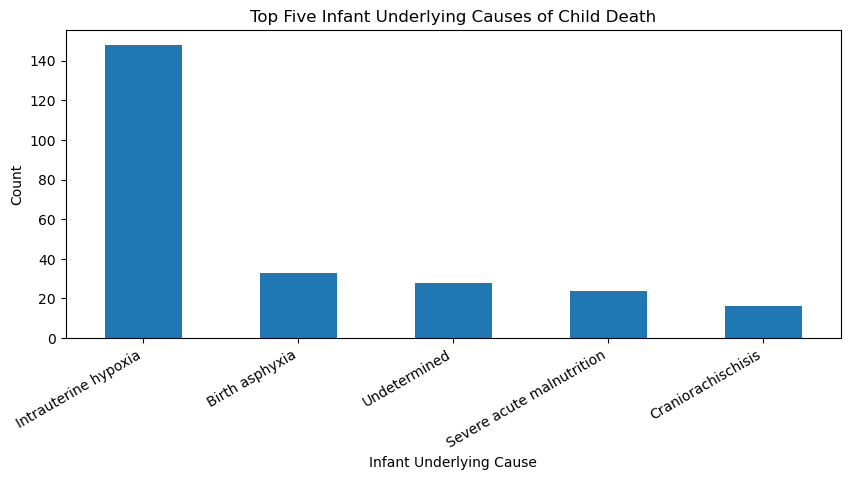

In [19]:
top_infant_causes = underlying_cause_counts.head(5)
top_infant_causes.plot(kind='bar', figsize=(10, 4))
plt.xlabel('Infant Underlying Cause')
plt.ylabel('Count')
plt.title('Top Five Infant Underlying Causes of Child Death')
plt.xticks(rotation=30, ha='right')
plt.show()


#### C. Plot top five maternal factors contributing to child death


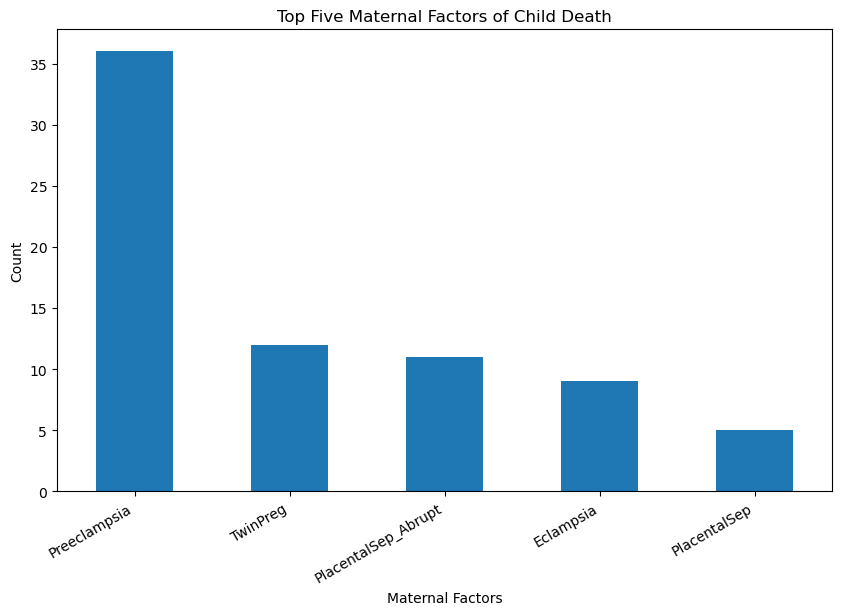

In [20]:
# Create a dictionary to map long labels to short ones, all in lower case and stripped of whitespaces
short_labels = {
    'preeclampsia': 'Preeclampsia',
    'twin pregnancy': 'TwinPreg',
    'fetus and newborn affected by other forms of placental separation and hemorrhage (abruption placenta)': 'PlacentalSep_Abrupt',
    'eclampsia': 'Eclampsia',
    'fetus and newborn affected by other forms of placental separation and hemorrhage': 'PlacentalSep'
}

# Get the top 5 causes
top_infant_causes = maternal_condition_counts.head(5)

# Replace the index with short labels, ignoring case and leading/trailing whitespaces
top_infant_causes.index = [short_labels[label.lower().strip()] if label.lower().strip() in short_labels else label for label in top_infant_causes.index]

# Plot
top_infant_causes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Maternal Factors')
plt.ylabel('Count')
plt.title('Top Five Maternal Factors of Child Death')
plt.xticks(rotation=30, ha='right')
plt.show()


#### D. Plot child death based on case types


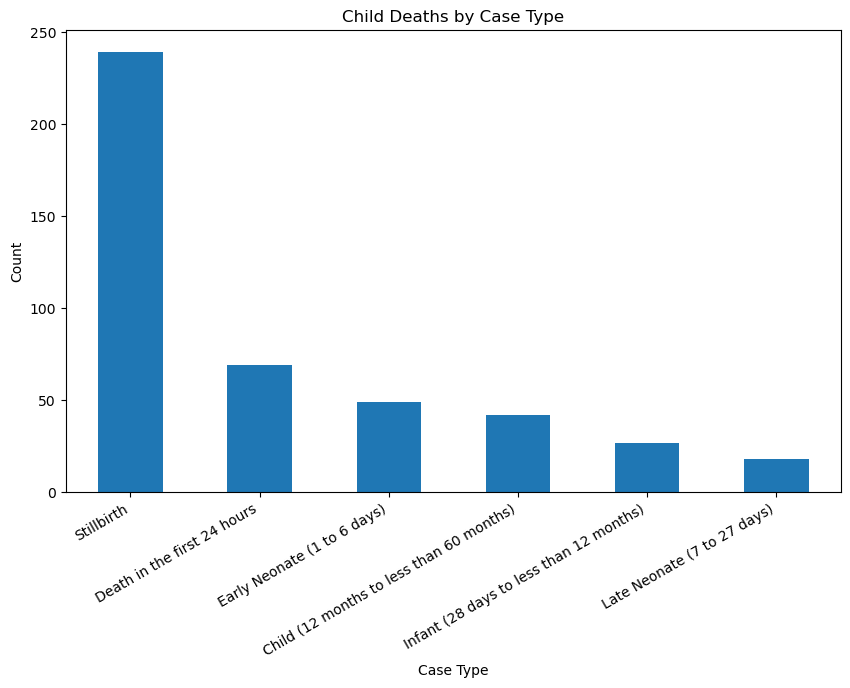

In [21]:
case_type_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.title('Child Deaths by Case Type')
plt.xticks(rotation=30, ha='right')
plt.show()
